In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing

In [2]:
df = pd.read_csv("marketing_campaign.csv")
df['TotSpent'] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
dfYes = df[df['Response'] == 1]
dfNo = df[df['Response'] == 0]

In [11]:
dfcorrmat = df.drop(['Z_CostContact','Z_Revenue', "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"], axis = 1)

In [37]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,WhichCampaign,TotSpent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,0,422


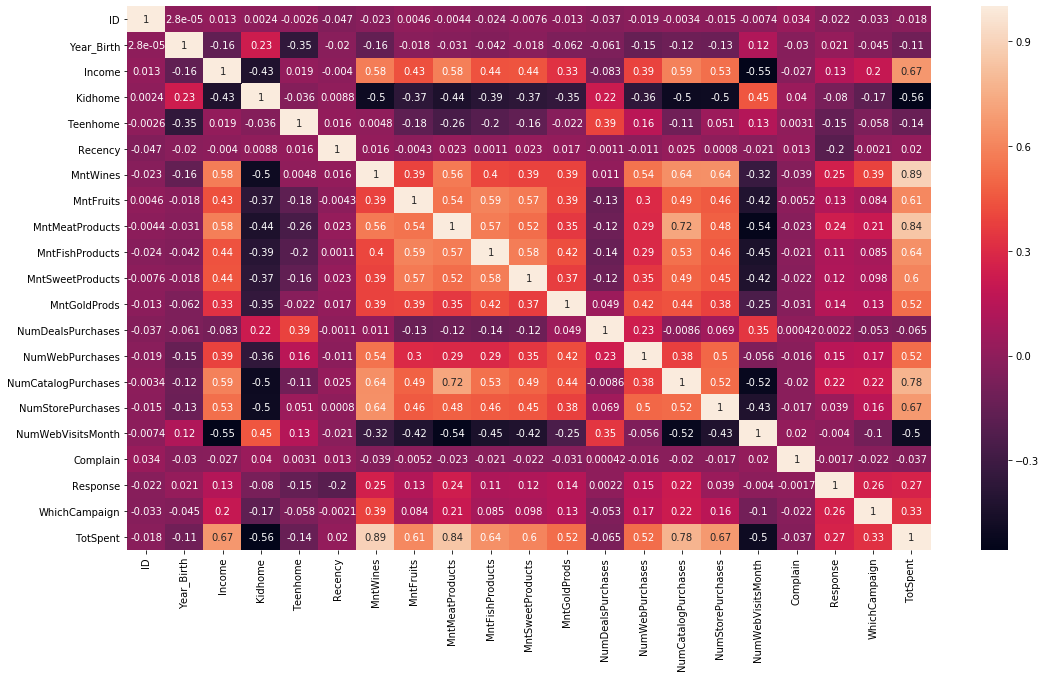

Ok there is a lot to unpack here. Why do people with kids make less money? And spend less on wines, fruit, etc. 


In [12]:
plt.figure(figsize=(18,10))

corrmatrix = dfcorrmat.corr()
sea.heatmap(corrmatrix, annot= True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t)
plt.show()
print ('Ok there is a lot to unpack here. Why do people with kids make less money? And spend less on wines, fruit, etc. ')

In [63]:
df.groupby(['WhichCampaign','Response']).size().unstack(fill_value = 0)

Response,0,1
WhichCampaign,,
0,1631,146
1,65,79
2,9,8
3,78,57
4,85,23
5,38,21


## EDA on Xs

### Income

C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


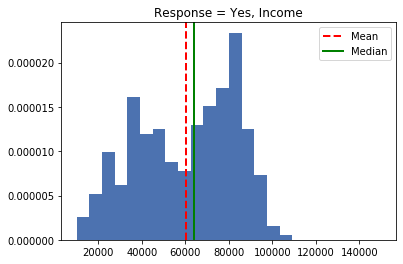

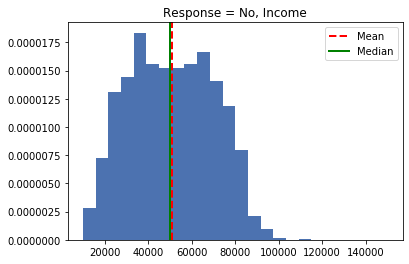

In [122]:
f = plt.figure(1)
plt.hist(dfYes['Income'], bins = np.linspace(10000,150000,25), density = True)
plt.title("Response = Yes, Income")
plt.axvline(x=np.mean(dfYes['Income']), color='r', linestyle='dashed', linewidth=2, label = "Mean")
plt.axvline(x=np.median(dfYes['Income'][~np.isnan(dfYes['Income'])]), color='g', linestyle='solid', linewidth=2, label = "Median")
plt.legend(loc = "upper right")
f.show()
g = plt.figure(2)
plt.hist(dfNo['Income'], bins = np.linspace(10000,150000,25), density = True)
plt.title("Response = No, Income")
plt.axvline(x=np.mean(dfNo['Income']), color='r', linestyle='dashed', linewidth=2, label = "Mean")
plt.axvline(x=np.median(dfNo['Income'][~np.isnan(dfNo['Income'])]), color='g', linestyle='solid', linewidth=2, label = "Median")
plt.legend(loc = "upper right")
g.show()

### Kidhome

In [140]:
gbkh = df.groupby(['Kidhome',"Response"]).size().unstack(fill_value = 0)
gbkh['Perc'] = round((gbkh[1])/(gbkh[0] + gbkh[1]),2)*100
display(gbkh)
print ("Ok so no really big difference here but who knows")

Response,0,1,Perc
Kidhome,,,
0,1071,222,17.0
1,789,110,12.0
2,46,2,4.0


Ok so no really big difference here but who knows


### Teenhome

In [143]:
gbth = df.groupby(['Teenhome',"Response"]).size().unstack(fill_value = 0)
gbth['Perc'] = round((gbth[1])/(gbth[0] + gbth[1]),2)*100
display(gbth)
print ("Having a teen at home makes you more than 50% less likely to respond, A.E.E")

Response,0,1,Perc
Teenhome,,,
0,921,237,20.0
1,938,92,9.0
2,47,5,10.0


Having a teen at home makes you more than 50% less likely to respond, A.E.E


### Total Spent on Products (Last 2 Years)

C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


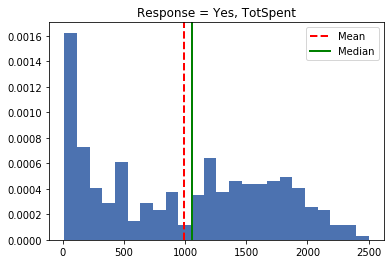

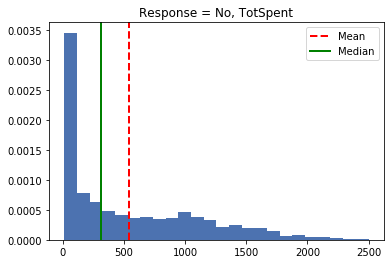

In [149]:
f = plt.figure(1)
plt.hist(dfYes['TotSpent'], bins = np.linspace(10,2500,25), density = True)
plt.title("Response = Yes, TotSpent")
plt.axvline(x=np.mean(dfYes['TotSpent']), color='r', linestyle='dashed', linewidth=2, label = "Mean")
plt.axvline(x=np.median(dfYes['TotSpent'][~np.isnan(dfYes['TotSpent'])]), color='g', linestyle='solid', linewidth=2, label = "Median")
plt.legend(loc = "upper right")
f.show()
g = plt.figure(2)
plt.hist(dfNo['TotSpent'], bins = np.linspace(10,2500,25), density = True)
plt.title("Response = No, TotSpent")
plt.axvline(x=np.mean(dfNo['TotSpent']), color='r', linestyle='dashed', linewidth=2, label = "Mean")
plt.axvline(x=np.median(dfNo['TotSpent'][~np.isnan(dfNo['TotSpent'])]), color='g', linestyle='solid', linewidth=2, label = "Median")
plt.legend(loc = "upper right")
g.show()

### Education

In [160]:
gbed = df.groupby(['Education',"Response"]).size().unstack(fill_value = 0)
gbed['Perc'] = round((gbed[1])/(gbed[0] + gbed[1]),2)*100
display(gbed)
print ("People with a college degree or higher have a 16.9% chance of repsonding, less educated have a 10.3%")

Response,0,1,Perc
Education,,,
2n Cycle,181,22,11.0
Basic,52,2,4.0
Graduation,975,152,13.0
Master,313,57,15.0
PhD,385,101,21.0


People with a college degree or higher have a 16.9% chance of repsonding, less educated have a 10.3%


In [167]:
gbprod = df.groupby(['Response'])[['MntFishProducts','MntMeatProducts','MntWines','MntSweetProducts','MntFruits','MntGoldProds']].median()
display(gbprod)
print ("Unsurprisingly, people who spend more at the store are more likely. The biggest difference is in Meat Products")

,MntFishProducts,MntMeatProducts,MntWines,MntSweetProducts,MntFruits,MntGoldProds
Response,,,,,,
0,11.0,56.0,152.0,7.0,7.0,21.0
1,25.0,174.5,448.0,20.0,21.0,39.5


Unsurprisingly, people who spend more at the store are more likely. The biggest difference is in Meat Products


In [170]:
gbprod = df.groupby(['Response'])[['NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases']].mean()
display(gbprod)
print ("Big difference here is catalog purchases. Web Purchases also different.")

,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases
Response,,,,
0,2.323190,2.391920,5.736621,3.911857
1,2.335329,4.203593,6.095808,5.071856


Big difference here is catalog purchases. Web Purchases also different.


In [173]:
gbprod = df.groupby(['Response'])[['NumWebPurchases','NumWebVisitsMonth']].mean()
display(gbprod)
print ("No real differences here. An uptick in web visits likely won't do much")

,NumWebPurchases,NumWebVisitsMonth
Response,,
0,3.911857,5.320567
1,5.071856,5.293413


No real differences here. An uptick in web visits likely won't do much


In [175]:
gbprod = df.groupby(['Response'])[['Recency']].mean()
display(gbprod)
print ("Customers who respond are much more likely to have been on the website recently")

,Recency
Response,
0,51.514690
1,35.383234


Customers who respond are much more likely to have been on the website recently


In [154]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,WhichCampaign,TotSpent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,0,422
